In [5]:
import pandas as pd
import numpy as np
import os
import operator
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS

In [6]:
train_df=pd.read_csv("./train.csv")
test_df=pd.read_csv("./test.csv")
sample_submission_df=pd.read_csv("./sample_submission.csv")


In [7]:
train_df.head(4)


,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50


In [8]:
test_df.head(4)

,id,anchor,target,context
0,4112d61851461f60,opc drum,inorganic photoconductor drum,G02
1,09e418c93a776564,adjust gas flow,altering gas flow,F23
2,36baf228038e314b,lower trunnion,lower locating,B60
3,1f37ead645e7f0c8,cap component,upper portion,D06


In [9]:
sample_submission_df.head(5)

,id,score
0,4112d61851461f60,0
1,09e418c93a776564,0
2,36baf228038e314b,0
3,1f37ead645e7f0c8,0
4,71a5b6ad068d531f,0


In [10]:
test_df.shape


(36, 4)

In [11]:
train_df.shape

(36473, 5)

In [12]:
sample_submission_df.shape

(36, 2)

In [13]:
g_train_df=train_df.groupby(["anchor"])["target"].count().reset_index().sort_values(["target"],ascending=False)
g_train_df.head(10)

,anchor,target
129,component composite coating,152
613,sheet supply roller,150
631,source voltage,140
482,perfluoroalkyl group,136
216,el display,135
54,average pore size,133
632,speed control means,130
476,parallel orientation,127
197,displacement mechanism,124
96,cathode layer,118


C:\Users\hojoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'anchors & target'}, xlabel='target'>

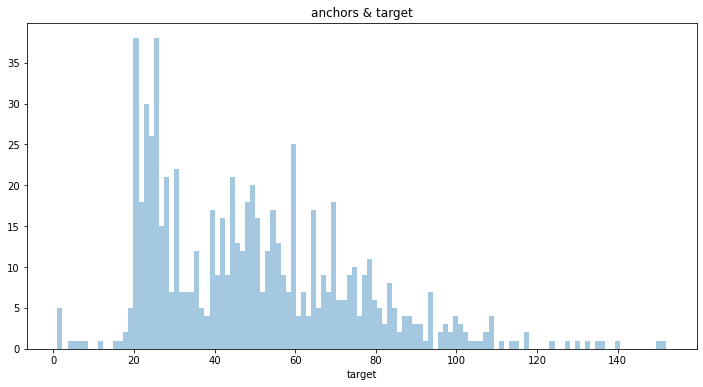

In [14]:
plt.figure(figsize=(12,6))
plt.title("anchors & target")
sns.distplot(g_train_df['target'],kde=False,hist=True,bins=120,label='anchors')

In [15]:
g_train_df.loc[g_train_df.target==1].head(10)


,anchor,target
485,peripheral nervous system stimulation,1
136,conduct conducting material,1


C:\Users\hojoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hojoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


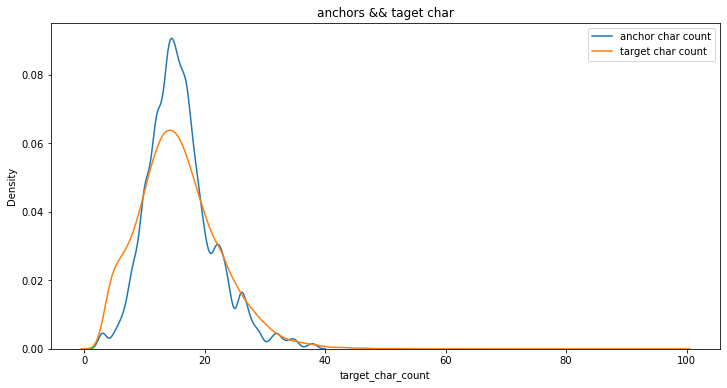

In [23]:
train_df["anchor_char_count"]=train_df["anchor"].apply(lambda x: len(x))
train_df["target_char_count"]=train_df["target"].apply(lambda x: len(x))

plt.figure(figsize=(12,6))
plt.title("anchors && taget char")
sns.distplot(train_df['anchor_char_count'],kde=True,hist=False,bins=120,label='anchor char count')
sns.distplot(train_df['target_char_count'],kde=True,hist=False,bins=120,label='target char count')
plt.legend()
plt.show()

C:\Users\hojoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hojoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


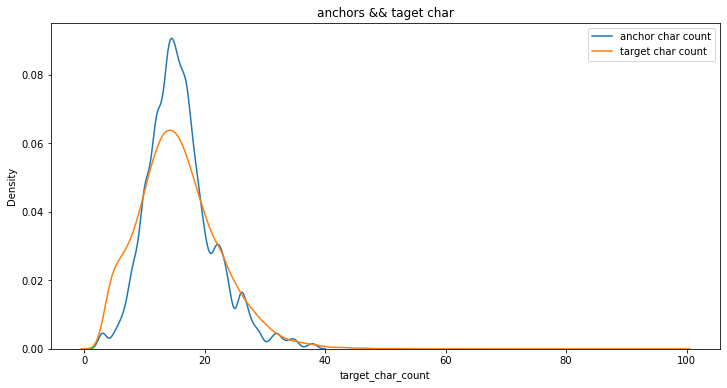

In [29]:
train_df["anchor_char_count"]=train_df["anchor"].apply(lambda x: len(x))
train_df["target_char_count"]=train_df["target"].apply(lambda x: len(x))
train_df["anchor_word_count"]=train_df["anchor"].apply(lambda x: len(x.split(" ")))
train_df["target_word_count"]=train_df["target"].apply(lambda x: len(x.split(" ")))
plt.figure(figsize=(12,6))
plt.title("anchors && taget char")
sns.distplot(train_df['anchor_char_count'],kde=True,hist=False,bins=120,label='anchor char count')
sns.distplot(train_df['target_char_count'],kde=True,hist=False,bins=120,label='target char count')
plt.legend()


C:\Users\hojoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hojoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


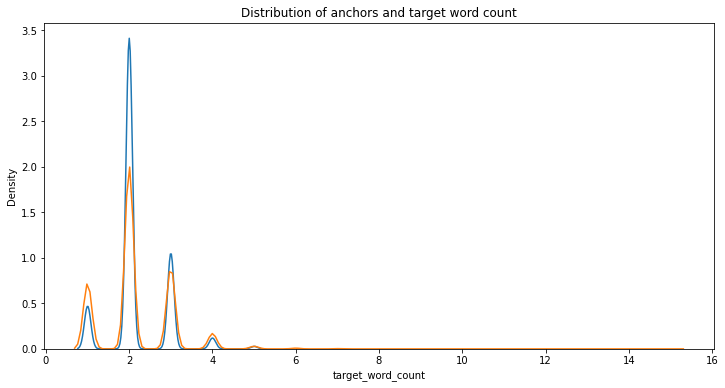

In [30]:
plt.figure(figsize=(12,6))
plt.title("Distribution of anchors and target word count")
sns.distplot(train_df['anchor_word_count'],kde=True,hist=False,bins=120,label='anchor word count')
sns.distplot(train_df['target_word_count'],kde=True,hist=False,bins=120,label='target word count')
plt.show()

In [34]:
train_df.loc[train_df.score==0].sample(10).head(10)

,id,anchor,target,context,score,anchor_char_count,target_char_count,anchor_word_count,target_word_count
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.0,9,13,1,2
14,9001756895ec8ca1,abatement,pollution certificate,A47,0.0,9,21,1,2
15,cc96541d4987b399,abatement,rent abatement,A47,0.0,9,14,1,2
18,1222e36d9a94c2a4,abatement,stone abutments,A47,0.0,9,15,1,2
19,a8c9e9f37d4d836a,abatement,tax abatement,A47,0.0,9,13,1,2
20,c450cc69fa315db9,abatement,water bodies,A47,0.0,9,12,1,2
26,4fd7d0a3b8887846,abatement,treatment,F16,0.0,9,9,1,1
29,56acc49e0f5da095,abatement,central hub,F24,0.0,9,11,1,2
30,bc5af15a01442792,abatement,control panel,F24,0.0,9,13,1,2
32,f0b0f0898ec291eb,abatement,diminished chord,F24,0.0,9,16,1,2


In [39]:
anchor_train_df=train_df[["context","anchor"]].drop_duplicates()
group_df=anchor_train_df.groupby(["context"])["anchor"].count().reset_index().sort_values(["anchor"],ascending=False)
group_df.head(10)

,context,anchor
101,H01,98
104,H04,80
88,G01,71
11,A61,66
76,F16,56
93,G06,46
46,C07,43
37,B65,39
0,A01,39
32,B60,36


C:\Users\hojoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


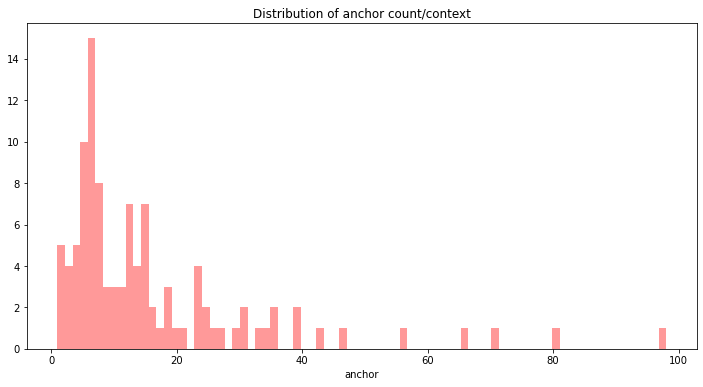

In [42]:
plt.figure(figsize=(12,6))
plt.title("Distribution of anchor count/context")
sns.distplot(group_df["anchor"],kde=False,hist=True,bins=80,label=None,color="red")
plt.show()

C:\Users\hojoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


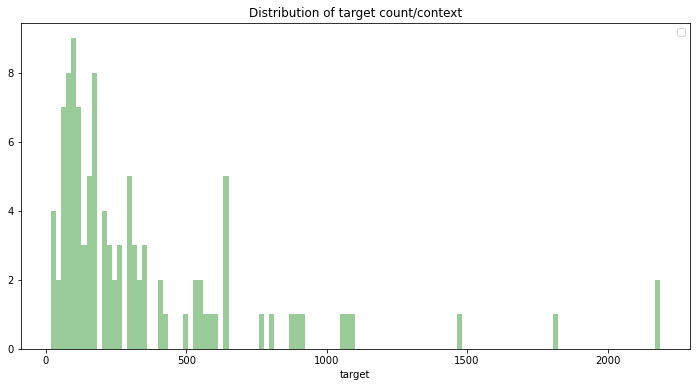

In [49]:
group_df = train_df.groupby(["context"])["target"].count().reset_index().sort_values(["target"], ascending=False)
plt.figure(figsize=(12,6))
plt.title("Distribution of target count/context")
sns.distplot(group_df["target"],kde=False,hist=True,bins=120,label=None,color='green')
plt.legend()